In [1]:
# FS wave propagation plots using solution to Helmholtz, 2015-11-23

%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm

<IPython.core.display.Javascript object>


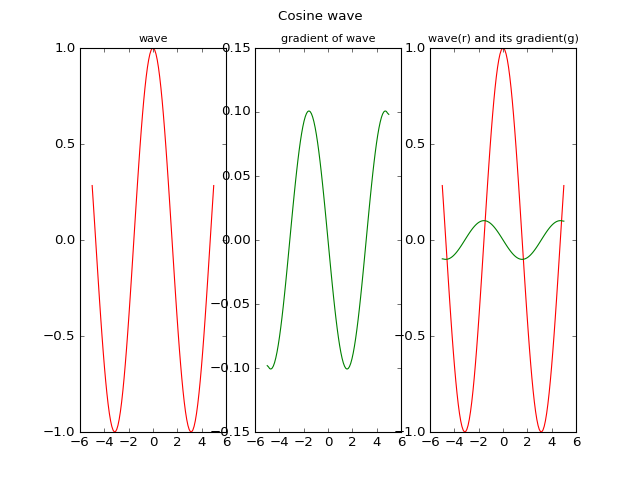

<IPython.core.display.Javascript object>


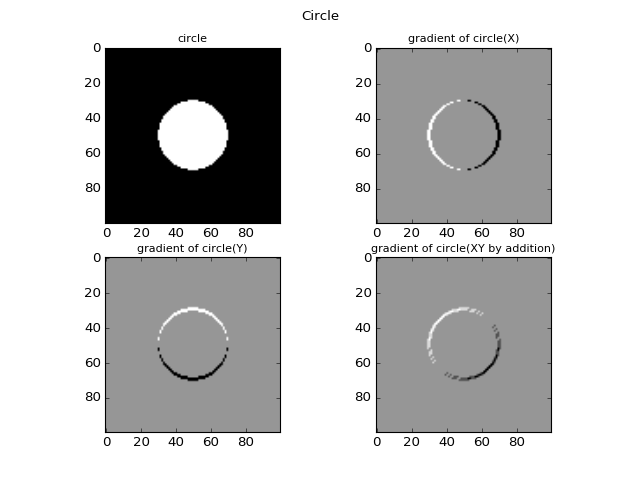

In [2]:

def circle(x,y,r):
    if(x**2+y**2<=r**2):
        return 1
    else:
        return 0
    
#sampling array- 1D array twice
space_to_plot=10
space_density=10
x_array = np.linspace(-space_to_plot*0.5,space_to_plot*0.5,space_to_plot*space_density)
cos_array = np.cos(x_array)
cos_grad = np.gradient(cos_array)

#circle matrix
def createCircleMatrix(x_array,r):
    circle_matrix = np.zeros((len(x_array),len(x_array)))
    for x in range(0,len(x_array)):
        for y in range(0,len(x_array)):
            circle_matrix[x][y] = circle(x_array[x],x_array[y],r)
    return circle_matrix

circ_matrix = createCircleMatrix(x_array,2)
circ_grad = np.gradient(circ_matrix)
 
#plotting
cos_fig = plt.figure()
cos_fig.suptitle("Cosine wave")

cos_subfig = cos_fig.add_subplot(1,3,1)
cos_subfig.set_title("wave",fontsize=10)
cos_subfig.plot(x_array,cos_array,"r")

cos_grad_subfig = cos_fig.add_subplot(1,3,2)
cos_grad_subfig.set_title("gradient of wave",fontsize=10)
cos_grad_subfig.plot(x_array,cos_grad,"g")

cos_tog_subfig = cos_fig.add_subplot(1,3,3)
cos_tog_subfig.set_title("wave(r) and its gradient(g)",fontsize=10)
cos_tog_subfig.plot(x_array,cos_array,"r")
cos_tog_subfig.plot(x_array,cos_grad,"g")

cos_fig.show()

circle_fig= plt.figure()
circle_fig.suptitle("Circle")

circ_subfig = circle_fig.add_subplot(2,2,1)
circ_subfig.set_title("circle",fontsize=10)
circ_subfig.imshow(circ_matrix,cmap=cm.Greys_r)

circ_gradX_subfig = circle_fig.add_subplot(2,2,2)
circ_gradX_subfig.set_title("gradient of circle(X)",fontsize=10)
circ_gradX_subfig.imshow(circ_grad[1],cmap=cm.Greys_r)

circ_gradY_subfig = circle_fig.add_subplot(2,2,3)
circ_gradY_subfig.set_title("gradient of circle(Y)",fontsize=10)
circ_gradY_subfig.imshow(circ_grad[0],cmap=cm.Greys_r)

circ_gradXY_subfig = circle_fig.add_subplot(2,2,4)
circ_gradXY_subfig.set_title("gradient of circle(XY by addition)",fontsize=10)
circ_gradXY_subfig.imshow(circ_grad[0]+circ_grad[1],cmap=cm.Greys_r)

circle_fig.show()


<IPython.core.display.Javascript object>


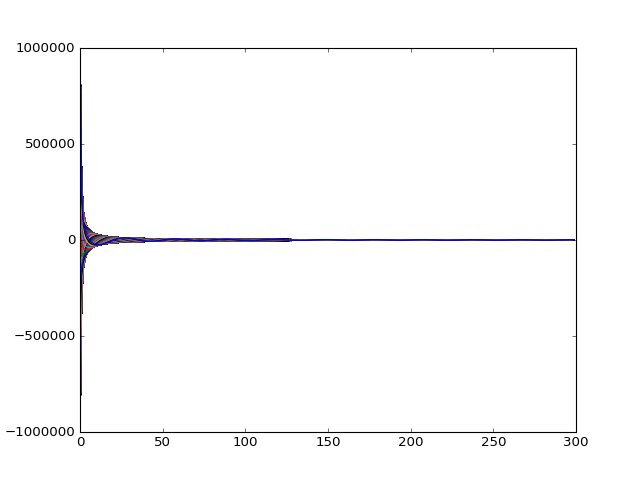

In [5]:
def amplitude(p):
    return 10/(max(0.00001,p*0.001)) # I guess the light looses energy during transmition (attenuation)
def phase(p):
    return np.pi*2*p #phase modeled as linear to distance
def phasor(p):
    return amplitude(p)*np.exp(1j*phase(p))
def u(p,t,nu):
    return np.real(phasor(p)*np.exp(-1j*2*np.pi*nu*t))

#produce sampling data and set wavelength
wavelength = 10
time_to_plot=10
sampling_ratio = 300
time_array = np.linspace(0,time_to_plot,time_to_plot*sampling_ratio)
space_to_plot=10
spacing_ratio = 30
space_array = np.linspace(0,space_to_plot,space_to_plot*spacing_ratio)

#propagation
def time_init():
    instance = np.zeros(len(space_array))
    
def time_instance(time,space_array,wavelength):
    instance = np.zeros(len(space_array))
    for x in range(0,len(space_array)):
        instance[x] = u(space_array[x],time,wavelength)
    return instance

def propagation(time_array,space_array,wavelength):
    time_instances = [0.0]*len(time_array)
    for t in range(0,len(time_array)):
        time_instances[t] = time_instance(time_array[t],space_array,wavelength)
    return time_instances

propag = propagation(time_array,space_array,wavelength)

#plotting
fig = plt.figure() 
im = fig.add_subplot(1,1,1)

# function to update figure
def updatefig(j):
    im = plt.plot(propag[j])
    return im,
# animation
ani = animation.FuncAnimation(fig, updatefig, frames=len(propag), 
                              interval=1)
fig.show()